<a href="https://colab.research.google.com/github/anhdang1/stock-correlation-analysis/blob/main/live_market_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install yfinance

In [ ]:
!pip install yfinance

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl,plt
#Data Source
import yfinance as yf
import plotly.graph_objs as go
plt.style.use('seaborn')
%matplotlib inline

Enter a ticket symbol

In [9]:
stock = input("Please enter a ticker symbol: ")

Please enter a ticker symbol: AAPL


**Getting live market data per minutes**
- Simply change the ticker to another stock symbol of your choice
- The **period** indicates the period time. 
> E.g. 5d means 5 days
- The **interval** indicates the analysis time use. 
> E.g. 1m means each rows return price change in 1 minute
> - Could be in minutes (m), hour (h), day (d), week (wk), and month (mo) 










In [10]:
data = yf.download(tickers = stock, period ='1d', interval = '5m')
#Interval required per minutes
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-03-18 09:30:00-04:00,160.509995,160.619995,159.759995,160.270004,160.270004,17293475
2022-03-18 09:35:00-04:00,160.279999,160.869995,160.020004,160.139999,160.139999,1790038
2022-03-18 09:40:00-04:00,160.139999,160.399902,160.009995,160.039902,160.039902,1185144
2022-03-18 09:45:00-04:00,160.049896,160.850006,159.940002,160.660095,160.660095,1697377
2022-03-18 09:50:00-04:00,160.664993,160.824997,160.229996,160.365005,160.365005,1108202
...,...,...,...,...,...,...
2022-03-18 15:40:00-04:00,164.125000,164.460007,164.044998,164.407196,164.407196,1843742
2022-03-18 15:45:00-04:00,164.399994,164.470001,164.220001,164.220001,164.220001,1644402
2022-03-18 15:50:00-04:00,164.220001,164.389999,163.449997,163.630005,163.630005,3035507


In [12]:
#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                             open = data['Open'],
                             high = data['High'],
                             low = data['Low'],
                             close = data ['Close'],
                             name = 'market data'))

#Add title
fig.update_layout(
    title = f"{stock} Live Share Price",  
    yaxis_title = 'Stock Price (USD Per Share)')

#X-axis
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
                        dict(count = 1, label = "1m", step = "minute", stepmode = "backward"),
                        dict(count = 5, label = "5m", step = "minute", stepmode = "backward"),
                        dict(count = 15, label = "15m", step = "minute", stepmode = "backward"),
                        dict(count = 1, label = "HTD", step = "hour", stepmode = "backward"),
                        dict(count = 2, label = "2h", step = "hour", stepmode = "backward"),
                        dict(step = 'all')
        ])
    )
)

#Display the graph
fig.show()


Conduct some stock correlation analysis between FAANG companies


In [27]:
stock = ["FB","AMZN","AAPL","NFLX","GOOGL"]
df = yf.download(tickers = stock, period ='1d', interval = '5m')
df1 = df[["Adj Close"]]   #take out adj close price to analyse the correlation of the picked stocks
df1


[*********************100%***********************]  5 of 5 completed


Adj Close                                        \
                                 AAPL         AMZN          FB        GOOGL   
Datetime                                                                      
2022-03-18 09:30:00-04:00  160.270004  3125.639893  207.634995  2649.639893   
2022-03-18 09:35:00-04:00  160.139999  3143.064941  208.179993  2653.300049   
2022-03-18 09:40:00-04:00  160.039902  3126.000000  208.322906  2649.250000   
2022-03-18 09:45:00-04:00  160.660095  3150.000000  208.792206  2660.989990   
2022-03-18 09:50:00-04:00  160.365005  3142.719971  208.750000  2654.570068   
...                               ...          ...         ...          ...   
2022-03-18 15:40:00-04:00  164.407196  3216.459961  214.979996  2718.350098   
2022-03-18 15:45:00-04:00  164.220001  3215.979980  214.904800  2716.570068   
2022-03-18 15:50:00-04:00  163.630005  3229.868896  215.330002  2720.000000   
2022-03-18 15:55:00-04:00  163.940308  3225.050049  216.539993  2722.219971   
2022-03-18 16:00:00-04:00  163.979996  3225.010010  216.490005  2722.510010   

                                       
                                 NFLX  
Datetime                               
2022-03-18 09:30:00-04:00  368.760010  
2022-03-18 09:35:00-04:00  369.505005  
2022-03-18 09:40:00-04:00  372.589996  
2022-03-18 09:45:00-04:00  374.660004  
2022-03-18 09:50:00-04:00  374.505005  
...                               ...  
2022-03-18 15:40:00-04:00  378.154999  
2022-03-18 15:45:00-04:00  378.315002  
2022-03-18 15:50:00-04:00  380.269989  
2022-03-18 15:55:00-04:00  380.559998  
2022-03-18 16:00:00-04:00  380.600006  

[79 rows x 5 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba078cc590>,
      dtype=object)

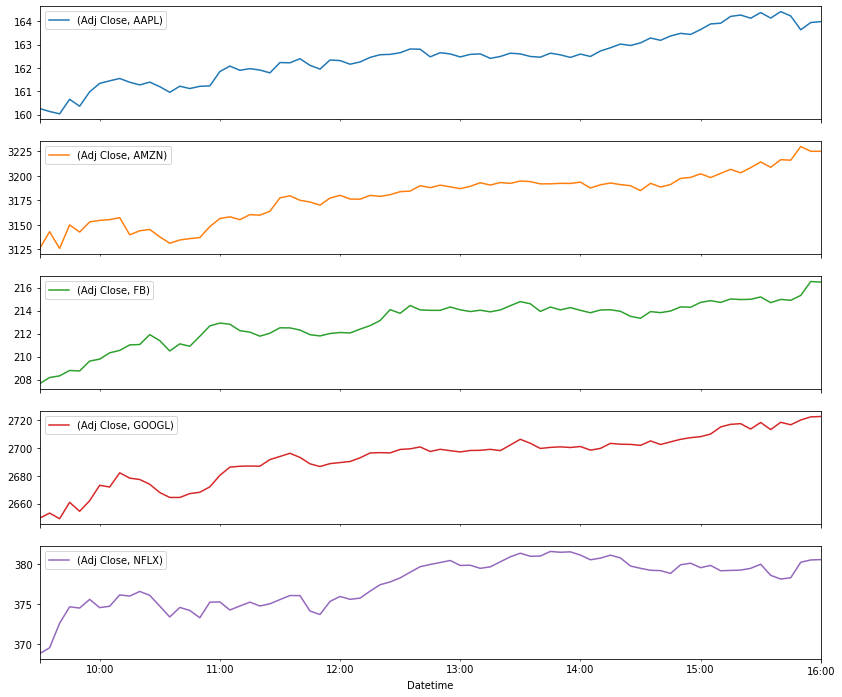

In [28]:
df1.plot(figsize=(14,12), subplots = True)

In [29]:
df1.describe().round(2)   #summary stats

Adj Close                                  
           AAPL     AMZN      FB    GOOGL    NFLX
count     79.00    79.00   79.00    79.00   79.00
mean     162.44  3178.81  213.01  2693.19  377.66
std        1.04    24.89    1.92    17.71    2.93
min      160.04  3125.64  207.63  2649.25  368.76
25%      161.87  3157.83  211.96  2686.42  375.26
50%      162.49  3186.96  213.83  2698.04  378.62
75%      162.99  3192.86  214.31  2702.93  380.00
max      164.41  3229.87  216.54  2722.51  381.63

In [31]:
df1.pct_change().round(3).head()  #percentage change every x time (e.g. every 1 min in this case)

Adj Close                            
                               AAPL   AMZN     FB  GOOGL   NFLX
Datetime                                                       
2022-03-18 09:30:00-04:00       NaN    NaN    NaN    NaN    NaN
2022-03-18 09:35:00-04:00    -0.001  0.006  0.003  0.001  0.002
2022-03-18 09:40:00-04:00    -0.001 -0.005  0.001 -0.002  0.008
2022-03-18 09:45:00-04:00     0.004  0.008  0.002  0.004  0.006
2022-03-18 09:50:00-04:00    -0.002 -0.002 -0.000 -0.002 -0.000

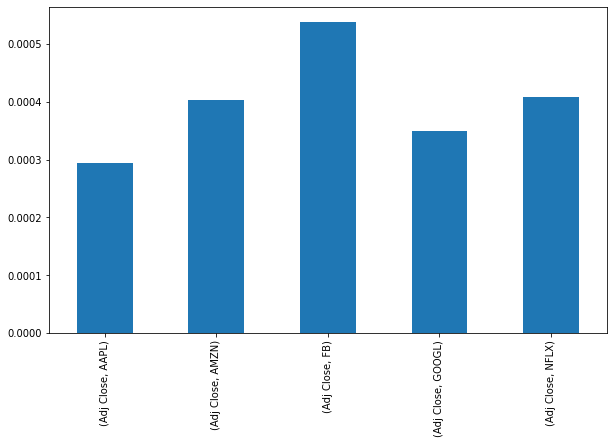

In [32]:
df1.pct_change().mean().plot(kind = 'bar', figsize = (10,6))   #plot average percent changes

In [48]:
returns = np.log(df1/df1.shift(1))   #log returns

In [49]:
returns.head().round(3).dropna() 

Adj Close                            
                               AAPL   AMZN     FB  GOOGL   NFLX
Datetime                                                       
2022-03-18 09:35:00-04:00    -0.001  0.006  0.003  0.001  0.002
2022-03-18 09:40:00-04:00    -0.001 -0.005  0.001 -0.002  0.008
2022-03-18 09:45:00-04:00     0.004  0.008  0.002  0.004  0.006
2022-03-18 09:50:00-04:00    -0.002 -0.002 -0.000 -0.002 -0.000

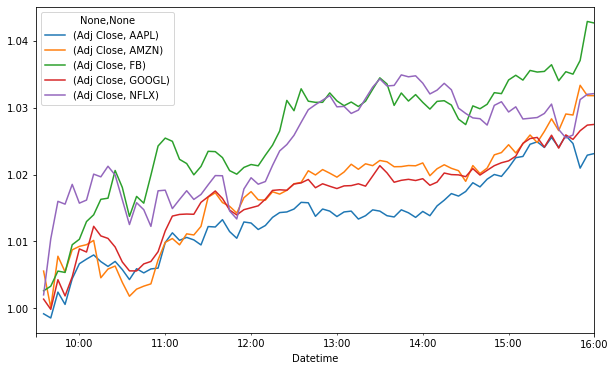

In [39]:
returns.cumsum().apply(np.exp).plot(figsize = (10,6))        #cummulative logs return plotted over time  (log returns addictive)

In [40]:
returns.dropna(inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba08fa6ad0>,
      dtype=object)

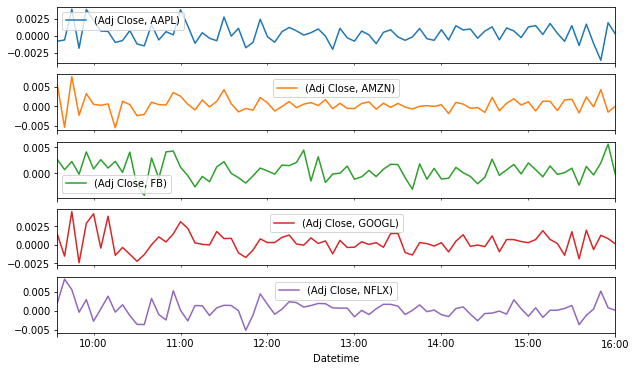

In [42]:
returns.plot(subplots = True, figsize = (10,6)) #clearer evidence of the correlation of applicable